<a href="https://colab.research.google.com/github/IThanasis/ml/blob/main/fetch_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [50]:
# Load the dataset
data = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

In [51]:
X, y = fetch_california_housing(return_X_y=True)

In [ ]:
# The target variable is the median house value for California districts,
# expressed in hundreds of thousands of dollars ($100,000).

In [52]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [53]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [54]:
X.shape

(20640, 8)

In [55]:
len(y)

20640

In [56]:
print(df.head())  # Displays the first 5 rows of the dataset

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [57]:
# we will use only one feature
X = X[:,[2]]

In [58]:
X

array([[6.98412698],
       [6.23813708],
       [8.28813559],
       ...,
       [5.20554273],
       [5.32951289],
       [5.25471698]])

In [61]:
X.shape

(20640, 1)

In [60]:
y.shape

(20640,)

In [62]:
# training  (import training test split)
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [64]:
X_train.shape

(16512, 1)

In [65]:
y_test.shape

(4128,)

In [66]:
X_test.shape

(4128, 1)

In [67]:
# apply linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, y_train)

In [69]:
regressor.coef_

array([0.06996834])

In [70]:
regressor.fit_intercept

True

In [71]:
regressor.intercept_

1.6882317733516197

In [ ]:
# write our model
# y = 1.688 + 957.0.0699*x

In [72]:
# evaluate our model (metrics: mse, mae, r2)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [73]:
y_pred = regressor.predict(X_test)

In [75]:
# import numpy as np
import numpy as np

In [76]:
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Coefficient of determination: {r2_score(y_test, y_pred):.2f}')
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Mean squared error: 1.30
Coefficient of determination: 0.02
Mean absolute error: 0.90
Root mean squared error: 1.14


In [77]:
np.mean(y)

2.068558169089147

In [78]:
# plot results
import matplotlib.pyplot as plt

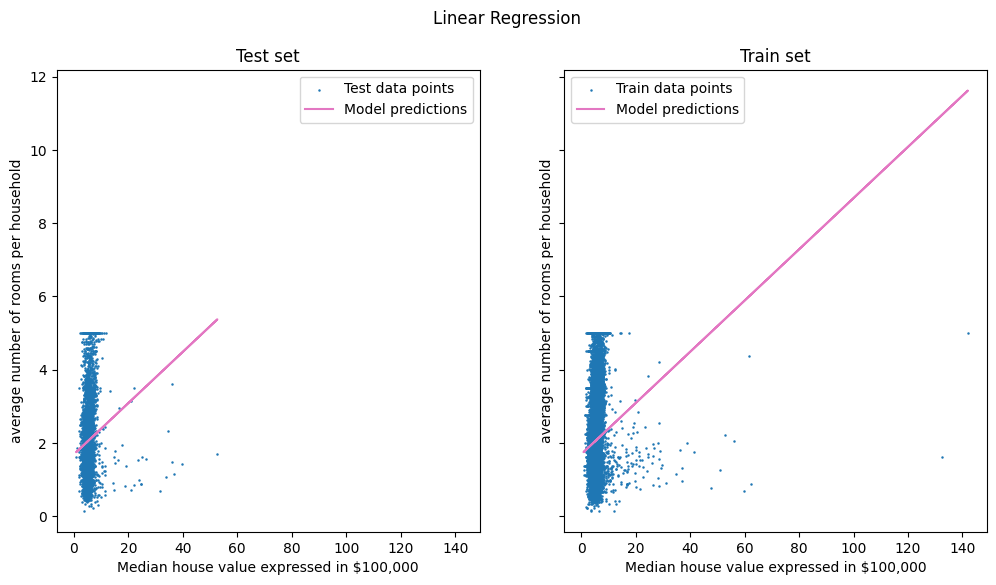

In [97]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6),sharex=True,sharey=True)


ax[1].scatter(X_train,y_train, s=0.6, label="Train data points")
ax[1].plot(

X_train, regressor.predict(X_train),
linewidth=1.5,
color = "tab:orange",
label = "Model predictions"

)

ax[1].legend()
ax[1].set(xlabel="Median house value expressed in $100,000",ylabel="average number of rooms per household",title="Train set")

ax[0].scatter(X_test,y_test, s=0.6, label="Test data points")
ax[0].plot(

X_test, y_pred,
linewidth=1.5,
color = "tab:orange",
label = "Model predictions"

)

ax[0].set(xlabel="Median house value expressed in $100,000",ylabel="average number of rooms per household",title="Test set")
ax[0].legend()

fig.suptitle("Linear Regression")

plt.show()